## **03. Python for Finance**
Será analisado um pouco da sintaxe do python

#### **3.1. Finance and Python Syntax**
Para ilustrar como funciona a sintaxe do Python, será utilizado como exemplo o código de construção do modelo de *Black-Shcoles-Merton*:

In [1]:
# Monte Carlo valuation of European call option in Black-Scholes-Merton model

# Importando as bibliotecas
import math
import numpy as np

# Valores dos parâmetros
S0 = 100 
K = 105
T = 1.0
r = 0.05
sigma = 0.2

I = 1000000 # número de simulações

# Algorítimo de valuation
z = np.random.standard_normal(I) # números pseudo-aleatórios

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)

C0 = math.exp(-r * T) * np.mean(hT)

# output do resultado
print('Value of the European call option: {:5.3f}.'.format(C0))

Value of the European call option: 8.024.


#### **3.2. Efficiency and Productivity Through Python**

Vamos observar um exemplo onde o Python é utilizado para o aumento da eficiência.

>*Consider a finance student who is writing their master’s thesis and is interested in S&P 500 index values. They want to analyze historical index levels for, say, a few years to see how the volatility of the index has fluctuated over time and hope to find evidence that volatility, in contrast to some typical model assumptions, fluctuates over time and is far from being constant. The results should also be visualized*. 

O estudante tem que fazer o seguinte:

- Pegar os dados do índice na internet
- Calcular a volatilidade etc.
- Plotar gráfico dos resultados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

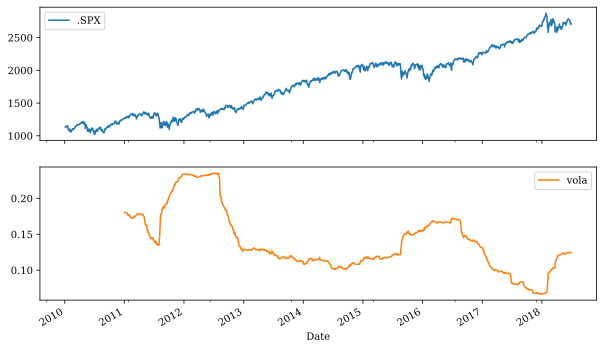

In [8]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

mpl.rcParams['font.family'] = 'serif' 
%config InlineBackend.figure_format = 'svg'

data = pd.read_csv("C:/Users/otavi/Documents/GitHub/Python_for_finance/source/tr_eikon_eod_data_rounded.csv",
                  index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()

data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6))

#### **3.3. Ensuring high performance**
Existem várias maneiras de se fazer a mesma coisa em Python, serão comparados a seguir códigos que possuem o mesmo output porém com uma velocidade de realização muito diferente.

In [11]:
import math

loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

776 ms ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
import numpy as np

a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

51.5 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
import numexpr as ne

ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

40.2 ms ± 825 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

16.6 ms ± 452 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
